# Data PreProcessing - User Preference

> ## Collaborative Filtering
>
> ### 2022-1 AI Capstone Ratio Project

### Duration

2022-03-02 ~ 2022-06-07

### Reference

데이터 성향 팀 분석 코드

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
mapoUsers = pd.read_csv("./mapo_users.csv")
mapoUsers = mapoUsers.fillna(0)

In [3]:
print(f"Number of user's records: {len(mapoUsers)}")
mapoUsers.head()

Number of user's records: 730841


,user,log_file,time,speed,distance,altitude,cadence,heart_rate,power,calories,...,balance_logger,bit11,bit12,bit13,bit14,bit15,start_latitude,start_longitude,current_latitude,current_longitude
0,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:24.893190,11.308594,3.330078,36.322002,0.0,0.0,0.0,0.000000,...,0.0,-1.376103e+19,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567185,127.182516
1,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:26.893190,11.441406,27.573242,35.635002,0.0,0.0,0.0,0.306641,...,0.0,-9.406581e-24,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567177,127.182791
2,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:28.893190,10.996094,50.360352,24.000000,0.0,0.0,0.0,0.000000,...,0.0,-9.511392e-24,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567170,127.183049
3,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:30.893190,11.492188,77.443359,24.353500,0.0,0.0,0.0,0.613281,...,0.0,2.326200e-24,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567189,127.183355
4,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:32.893190,11.859375,104.261719,24.266689,0.0,0.0,0.0,0.919922,...,0.0,-1.049428e-23,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567173,127.183659


In [4]:
mapoDistForDuration = (mapoUsers.distance - mapoUsers.distance.shift()).fillna(0).abs()
mapoUsers["dist_for_duration"] = mapoDistForDuration
mapoUsers.loc[mapoUsers.distance==0 ,'dist'] = 0
mapoUsers.head()

,user,log_file,time,speed,distance,altitude,cadence,heart_rate,power,calories,...,bit12,bit13,bit14,bit15,start_latitude,start_longitude,current_latitude,current_longitude,dist_for_duration,dist
0,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:24.893190,11.308594,3.330078,36.322002,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567185,127.182516,0.000000,NaN
1,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:26.893190,11.441406,27.573242,35.635002,0.0,0.0,0.0,0.306641,...,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567177,127.182791,24.243164,NaN
2,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:28.893190,10.996094,50.360352,24.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567170,127.183049,22.787109,NaN
3,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:30.893190,11.492188,77.443359,24.353500,0.0,0.0,0.0,0.613281,...,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567189,127.183355,27.083008,NaN
4,yjCBTfEVL0dwmUFzU3GvqroV0XC3,log647152073.log,2004-12-17 21:02:32.893190,11.859375,104.261719,24.266689,0.0,0.0,0.0,0.919922,...,0.0,0.0,0.0,0.0,37.567185,127.182516,37.567173,127.183659,26.818359,NaN


In [5]:
mapoUserDistByPath = mapoUsers.groupby(['user', 'log_file']).max()["distance"]
avgDistByUser = mapoUserDistByPath.groupby('user').mean()
avgDistByUser.name = 'average_distance'
print(avgDistByUser)

user
01WPXP7OfDQtMeFqczOs0yoKms32     8473.474365
0ChSzKE66sQX8VyC96HbVj3dK3e2     2195.347130
0gVyJmbbAzf771Qk0SvD6c1RRYY2      536.809896
16viBpfO0tc2DcTfeTa9TjN6Nam2    11824.903861
2Ea7BdHDdPbCo4XngUzyIX2yBou1      540.617477
                                    ...     
watlo38e0TU89EyhbKwxSXX5IPN2     1848.791193
yjCBTfEVL0dwmUFzU3GvqroV0XC3     5433.049886
yrAH0r8mtkQNNejCKdBi5towyCv1      715.664062
yrNIQAh3qiOfYaOnfCBUloEftbm1        5.885742
zWpiirYETyPonGd1JQmoj31SQMX2      219.001343
Name: average_distance, Length: 79, dtype: float64


In [6]:
mapoUserSpeedByPath = mapoUsers.groupby(['user', 'log_file']).max()["speed"]
avgSpeedByUser = mapoUserSpeedByPath.groupby('user').mean()
avgSpeedByUser.name = 'average_speed'
print(avgSpeedByUser)

user
01WPXP7OfDQtMeFqczOs0yoKms32    2.513672
0ChSzKE66sQX8VyC96HbVj3dK3e2    3.207091
0gVyJmbbAzf771Qk0SvD6c1RRYY2    3.705729
16viBpfO0tc2DcTfeTa9TjN6Nam2    8.537650
2Ea7BdHDdPbCo4XngUzyIX2yBou1    3.395656
                                  ...   
watlo38e0TU89EyhbKwxSXX5IPN2    4.601562
yjCBTfEVL0dwmUFzU3GvqroV0XC3    7.881076
yrAH0r8mtkQNNejCKdBi5towyCv1    5.824219
yrNIQAh3qiOfYaOnfCBUloEftbm1    1.152344
zWpiirYETyPonGd1JQmoj31SQMX2    3.113281
Name: average_speed, Length: 79, dtype: float64


In [7]:
def get_increment(column:pd.Series):
	increment = 0
	deltas = (column - column.shift()).fillna(0)
	for delta in deltas:
		if delta >= 0:
			increment = increment + delta
	return increment

def get_decrease(column:pd.Series):
	decrease = 0
	deltas = (column - column.shift()).fillna(0)
	for delta in deltas:
		if delta < 0:
			decrease = decrease + delta
	return decrease

testSeries = pd.Series([1, 2, 3, 4, 3, 2, 1])
print(f"Increment of testSeries: {get_increment(testSeries)}")
print(f"Decrease of testSeries: {get_decrease(testSeries)}")

Increment of testSeries: 3.0
Decrease of testSeries: -3.0


In [8]:
incrementOfAltitudeByPath = mapoUsers.groupby(['user', 'log_file'])["altitude"].apply(get_increment)
incrementOfAltitude = incrementOfAltitudeByPath.groupby('user').sum()
incrementOfAltitude.name = 'increment_of_altitude'
incrementOfAltitude

user
01WPXP7OfDQtMeFqczOs0yoKms32       57.378220
0ChSzKE66sQX8VyC96HbVj3dK3e2     4805.853708
0gVyJmbbAzf771Qk0SvD6c1RRYY2       14.941620
16viBpfO0tc2DcTfeTa9TjN6Nam2    12407.602522
2Ea7BdHDdPbCo4XngUzyIX2yBou1     1657.209263
                                    ...     
watlo38e0TU89EyhbKwxSXX5IPN2      438.542952
yjCBTfEVL0dwmUFzU3GvqroV0XC3     2704.938116
yrAH0r8mtkQNNejCKdBi5towyCv1       63.736870
yrNIQAh3qiOfYaOnfCBUloEftbm1       53.524422
zWpiirYETyPonGd1JQmoj31SQMX2      282.544395
Name: increment_of_altitude, Length: 79, dtype: float64

In [9]:
decreaseOfAltitudeByPath = mapoUsers.groupby(['user', 'log_file'])["altitude"].apply(get_decrease)
decreaseOfAltitude = decreaseOfAltitudeByPath.groupby('user').sum()
decreaseOfAltitude.name = 'decrease_of_altitude'
decreaseOfAltitude

user
01WPXP7OfDQtMeFqczOs0yoKms32      -47.202562
0ChSzKE66sQX8VyC96HbVj3dK3e2    -5061.911475
0gVyJmbbAzf771Qk0SvD6c1RRYY2     -124.053680
16viBpfO0tc2DcTfeTa9TjN6Nam2   -11707.163043
2Ea7BdHDdPbCo4XngUzyIX2yBou1    -1230.799986
                                    ...     
watlo38e0TU89EyhbKwxSXX5IPN2     -383.603352
yjCBTfEVL0dwmUFzU3GvqroV0XC3    -2843.131828
yrAH0r8mtkQNNejCKdBi5towyCv1      -18.877949
yrNIQAh3qiOfYaOnfCBUloEftbm1      -70.472870
zWpiirYETyPonGd1JQmoj31SQMX2     -133.132595
Name: decrease_of_altitude, Length: 79, dtype: float64

In [10]:
userPreference = pd.concat([avgDistByUser, avgSpeedByUser, incrementOfAltitude, decreaseOfAltitude], axis=1)
userPreference

,average_distance,average_speed,increment_of_altitude,decrease_of_altitude
user,,,,
01WPXP7OfDQtMeFqczOs0yoKms32,8473.474365,2.513672,57.378220,-47.202562
0ChSzKE66sQX8VyC96HbVj3dK3e2,2195.347130,3.207091,4805.853708,-5061.911475
0gVyJmbbAzf771Qk0SvD6c1RRYY2,536.809896,3.705729,14.941620,-124.053680
16viBpfO0tc2DcTfeTa9TjN6Nam2,11824.903861,8.537650,12407.602522,-11707.163043
2Ea7BdHDdPbCo4XngUzyIX2yBou1,540.617477,3.395656,1657.209263,-1230.799986
...,...,...,...,...
watlo38e0TU89EyhbKwxSXX5IPN2,1848.791193,4.601562,438.542952,-383.603352
yjCBTfEVL0dwmUFzU3GvqroV0XC3,5433.049886,7.881076,2704.938116,-2843.131828
yrAH0r8mtkQNNejCKdBi5towyCv1,715.664062,5.824219,63.736870,-18.877949


In [11]:
userPreference.to_csv('user_preference.csv')

In [12]:
colnames = userPreference.columns

scaler = RobustScaler()
scaler.fit(userPreference)
print(scaler.transform(userPreference))

[[ 2.38643291e+00 -9.26706183e-01 -4.96964148e-01  4.61576320e-01]
 [ 1.24841063e-01 -7.44684938e-01  1.34646209e+00 -1.54833862e+00]
 [-4.72619634e-01 -6.13793493e-01 -5.13438645e-01  4.30774091e-01]
 [ 3.59373013e+00  6.54576099e-01  4.29756993e+00 -4.21178142e+00]
 [-4.71248016e-01 -6.95187023e-01  1.24113191e-01 -1.28141548e-02]
 [ 1.08583599e+00  3.62425741e-01  9.16122137e-01 -1.10325524e+00]
 [-1.40348163e-01 -4.67165232e-02  7.34572650e-02 -3.34923019e-02]
 [ 8.31434895e+00  3.22361014e-01 -4.89322201e-01  4.72541533e-01]
 [-1.72675873e-01 -1.66267175e-03  2.80382619e-01 -8.46645553e-02]
 [ 2.40513712e-01  3.74607290e-01 -4.48598562e-01  3.88162244e-01]
 [-1.17509640e-01 -1.73676354e-01  8.33483876e-01 -6.99992180e-01]
 [-4.37873048e-01 -1.22000310e-01 -4.35840260e-01  3.84725105e-01]
 [-1.59572957e-01  4.38591185e-01  1.28388369e+00 -1.38121461e+00]
 [ 1.87796238e+02  1.20599107e+00  2.21380982e+00 -1.99468525e+00]
 [-9.20284949e-02 -2.83616554e-03 -2.13384341e-01  1.33466131e

In [13]:
new_colnames = [i+'_rs' for i in colnames]

rs_df = pd.DataFrame(scaler.fit_transform(userPreference[colnames]), columns = new_colnames)
rs_df

,average_distance_rs,average_speed_rs,increment_of_altitude_rs,decrease_of_altitude_rs
0,2.386433,-0.926706,-0.496964,0.461576
1,0.124841,-0.744685,1.346462,-1.548339
2,-0.472620,-0.613793,-0.513439,0.430774
3,3.593730,0.654576,4.297570,-4.211781
4,-0.471248,-0.695187,0.124113,-0.012814
...,...,...,...,...
74,0.000000,-0.378639,-0.348991,0.326746
75,1.291170,0.482227,0.530857,-0.659043
76,-0.408190,-0.057694,-0.494496,0.472929
77,-0.663876,-1.284052,-0.498460,0.452249


In [14]:
rs_df.index = userPreference.index
rs_df

,average_distance_rs,average_speed_rs,increment_of_altitude_rs,decrease_of_altitude_rs
user,,,,
01WPXP7OfDQtMeFqczOs0yoKms32,2.386433,-0.926706,-0.496964,0.461576
0ChSzKE66sQX8VyC96HbVj3dK3e2,0.124841,-0.744685,1.346462,-1.548339
0gVyJmbbAzf771Qk0SvD6c1RRYY2,-0.472620,-0.613793,-0.513439,0.430774
16viBpfO0tc2DcTfeTa9TjN6Nam2,3.593730,0.654576,4.297570,-4.211781
2Ea7BdHDdPbCo4XngUzyIX2yBou1,-0.471248,-0.695187,0.124113,-0.012814
...,...,...,...,...
watlo38e0TU89EyhbKwxSXX5IPN2,0.000000,-0.378639,-0.348991,0.326746
yjCBTfEVL0dwmUFzU3GvqroV0XC3,1.291170,0.482227,0.530857,-0.659043
yrAH0r8mtkQNNejCKdBi5towyCv1,-0.408190,-0.057694,-0.494496,0.472929


In [15]:
def plot_describe_features(df:pd.DataFrame):
	for col in df.columns:
		vals = df[col].values

		sns.kdeplot(vals)
		plt.title(col)
		plt.show()

		print(df[col].describe())

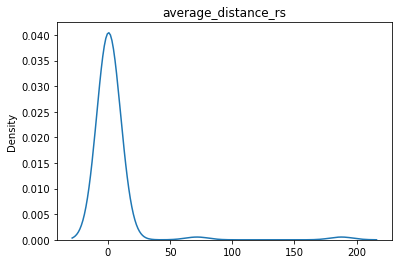

count     79.000000
mean       3.894005
std       22.527178
min       -0.665997
25%       -0.355382
50%        0.000000
75%        0.644618
max      187.796238
Name: average_distance_rs, dtype: float64


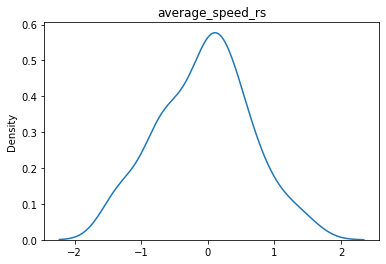

count    79.000000
mean     -0.057132
std       0.680954
min      -1.376337
25%      -0.636181
50%       0.000000
75%       0.363819
max       1.488071
Name: average_speed_rs, dtype: float64


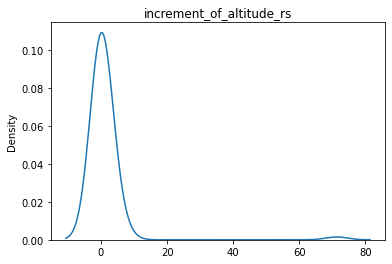

count    79.000000
mean      1.341311
std       8.096071
min      -0.519239
25%      -0.438361
50%       0.000000
75%       0.561639
max      71.274700
Name: increment_of_altitude_rs, dtype: float64


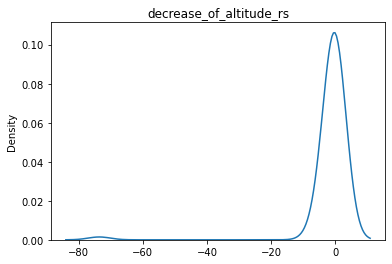

count    79.000000
mean     -1.388305
std       8.345780
min     -73.601642
25%      -0.598770
50%       0.000000
75%       0.401230
max       0.480495
Name: decrease_of_altitude_rs, dtype: float64


In [16]:
plot_describe_features(rs_df)

In [17]:
def categorize_column(df:pd.DataFrame, bins_cnt):
    categorized = pd.DataFrame(index=df.index)
    for idx, col in enumerate(df.columns):
        cnt, bins = np.histogram(df[col], bins = bins_cnt[idx])
        bins[0] -= 0.0001
        bins[-1] += 0.0001
        print(f'{col} categorize: {cnt}, {bins}',end='')
        categorized[f'{col}_categorized'] = pd.cut(x=df[col], bins= bins, labels= [i+1 for i in range(bins_cnt[idx])])
        print(f' label: {[i+1 for i in range(bins_cnt[idx])]}')

    return categorized

In [18]:
categorizedUserPreference = categorize_column(rs_df, [3, 3, 2, 2])
categorizedUserPreference

average_distance_rs categorize: [77  1  1], [ -0.66609655  62.15474821 124.97549297 187.79633773] label: [1, 2, 3]
average_speed_rs categorize: [23 42 14], [-1.3764366  -0.42153419  0.53326821  1.48817061] label: [1, 2, 3]
increment_of_altitude_rs categorize: [78  1], [-0.5193392  35.37773059 71.27480038] label: [1, 2]
decrease_of_altitude_rs categorize: [ 1 78], [-73.60174178 -36.56057324   0.48059529] label: [1, 2]


,average_distance_rs_categorized,average_speed_rs_categorized,increment_of_altitude_rs_categorized,decrease_of_altitude_rs_categorized
user,,,,
01WPXP7OfDQtMeFqczOs0yoKms32,1,1,1,2
0ChSzKE66sQX8VyC96HbVj3dK3e2,1,1,1,2
0gVyJmbbAzf771Qk0SvD6c1RRYY2,1,1,1,2
16viBpfO0tc2DcTfeTa9TjN6Nam2,1,3,1,2
2Ea7BdHDdPbCo4XngUzyIX2yBou1,1,1,1,2
...,...,...,...,...
watlo38e0TU89EyhbKwxSXX5IPN2,1,2,1,2
yjCBTfEVL0dwmUFzU3GvqroV0XC3,1,2,1,2
yrAH0r8mtkQNNejCKdBi5towyCv1,1,2,1,2


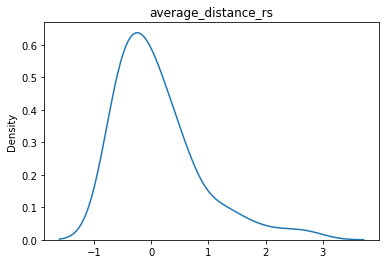

count    72.000000
mean      0.111135
std       0.736208
min      -0.665997
25%      -0.413430
50%      -0.080275
75%       0.361955
max       2.777214
Name: average_distance_rs, dtype: float64
count: [56 12 11], bins: [ -0.66609655   0.48174043   1.62947742 187.79633773]


In [19]:
threshold = 3
col = 'average_distance_rs'
bins_count = 3
labels = [i+1 for i in range(bins_count)]


vals = rs_df[rs_df.average_distance_rs <= threshold][col].values

sns.kdeplot(vals)
plt.title(col)
plt.show()
print(rs_df[rs_df.average_distance_rs <= threshold][col].describe())

cnt, bins = np.histogram(rs_df[rs_df.average_distance_rs <= threshold][col], bins = bins_count)
bins[0] -= 0.0001
bins[-1] = rs_df[col].max() + 0.0001
cnt[-1] += rs_df[rs_df.average_distance_rs > threshold][col].count()

print(f'count: {cnt}, bins: {bins}')
categorizedUserPreference[f'{col}_categorized'] = pd.cut(x=rs_df[col], bins= bins, labels = labels)

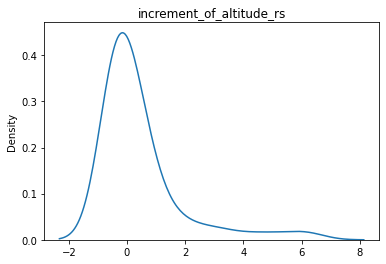

count    78.000000
mean      0.444729
std       1.438059
min      -0.519239
25%      -0.438628
50%      -0.005662
75%       0.518769
max       6.336351
Name: increment_of_altitude_rs, dtype: float64
count: [72  7], bins: [-0.5193392   2.90855607 71.27480038]


In [20]:
threshold = 20
col = 'increment_of_altitude_rs'
bins_count = 2
labels = [i+1 for i in range(bins_count)]


vals = rs_df[rs_df.increment_of_altitude_rs <= threshold][col].values

sns.kdeplot(vals)
plt.title(col)
plt.show()
print(rs_df[rs_df.increment_of_altitude_rs <= threshold][col].describe())

cnt, bins = np.histogram(rs_df[rs_df.increment_of_altitude_rs <= threshold][col], bins = bins_count)
bins[0] -= 0.0001
bins[-1] = rs_df[col].max() + 0.0001
cnt[-1] += rs_df[rs_df.increment_of_altitude_rs > threshold][col].count()

print(f'count: {cnt}, bins: {bins}')
categorizedUserPreference[f'{col}_categorized'] = pd.cut(x=rs_df[col], bins= bins, labels = labels)

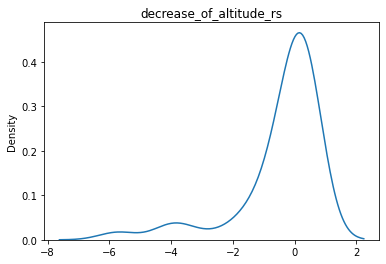

count    78.000000
mean     -0.462493
std       1.401469
min      -5.860362
25%      -0.531471
50%       0.006767
75%       0.401348
max       0.480495
Name: decrease_of_altitude_rs, dtype: float64
count: [ 8 71], bins: [-73.60174178  -2.68993318   0.48049529]


In [21]:
threshold = -20
col = 'decrease_of_altitude_rs'
bins_count = 2
labels = [i+1 for i in range(bins_count)]


vals = rs_df[rs_df.decrease_of_altitude_rs >= threshold][col].values

sns.kdeplot(vals)
plt.title(col)
plt.show()
print(rs_df[rs_df.decrease_of_altitude_rs >= threshold][col].describe())

cnt, bins = np.histogram(rs_df[rs_df.decrease_of_altitude_rs >= threshold][col], bins = bins_count)
bins[0] -= 0.0001
bins[0] = rs_df[col].min() - 0.0001
cnt[0] += rs_df[rs_df.decrease_of_altitude_rs < threshold][col].count()

print(f'count: {cnt}, bins: {bins}')
categorizedUserPreference[f'{col}_categorized'] = pd.cut(x=rs_df[col], bins= bins, labels = labels)

In [22]:
categorizedUserPreference = categorizedUserPreference.drop([categorizedUserPreference.columns[-1]], axis =1)
categorizedUserPreference = categorizedUserPreference.reset_index()
categorizedUserPreference

,user,average_distance_rs_categorized,average_speed_rs_categorized,increment_of_altitude_rs_categorized
0,01WPXP7OfDQtMeFqczOs0yoKms32,3,1,1
1,0ChSzKE66sQX8VyC96HbVj3dK3e2,1,1,1
2,0gVyJmbbAzf771Qk0SvD6c1RRYY2,1,1,1
3,16viBpfO0tc2DcTfeTa9TjN6Nam2,3,3,2
4,2Ea7BdHDdPbCo4XngUzyIX2yBou1,1,1,1
...,...,...,...,...
74,watlo38e0TU89EyhbKwxSXX5IPN2,1,2,1
75,yjCBTfEVL0dwmUFzU3GvqroV0XC3,2,2,1
76,yrAH0r8mtkQNNejCKdBi5towyCv1,1,2,1
77,yrNIQAh3qiOfYaOnfCBUloEftbm1,1,1,1


In [23]:
# 1: 단거리 주로 사용 2: 중거리 주로 사용 3: 장거리 주로 사용
categorizedUserPreference[['user','average_distance_rs_categorized']].groupby('average_distance_rs_categorized').count()

,user
average_distance_rs_categorized,
1,56
2,12
3,11


In [24]:
# 1: 느긋한 속도 2: 중간 속도 3: 빠른 속도
categorizedUserPreference[['user','average_speed_rs_categorized']].groupby('average_speed_rs_categorized').count()

,user
average_speed_rs_categorized,
1,23
2,42
3,14


In [25]:
# 1: 오르막 비선호 2: 오르막 선호
categorizedUserPreference[['user','increment_of_altitude_rs_categorized']].groupby('increment_of_altitude_rs_categorized').count()

,user
increment_of_altitude_rs_categorized,
1,72
2,7


In [ ]:
categorizedUserPreference.to_csv("categorized_user_preference.csv")